In [1]:
import re
import warnings

import pandas as pd
import seaborn as sns
warnings.filterwarnings('ignore')

c:\users\sichi\pycharmprojects\nlpproiect\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\sichi\pycharmprojects\nlpproiect\venv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\sichi\pycharmprojects\nlpproiect\venv\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\sichi\pycharmprojects\nlpproiect\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data

## Loading data

In [3]:
train = pd.read_csv('data/raw/train.csv')
cv = pd.read_csv('data/raw/cv.csv')
test = pd.read_csv('data/raw/test.csv')

In [4]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,But they'll have all those reviews!,RoguishPoppet,ProductTesting,0,-1,-1,2016-11,2016-11-01 02:04:59,"The dumb thing is, they are risking their sell..."
1,1,wow it is totally unreasonable to assume that ...,pb2crazy,politics,2,-1,-1,2016-11,2016-11-01 02:42:11,Clinton campaign accuses FBI of 'blatant doubl...
2,1,Ho ho ho... But Melania said that there is no ...,pb2crazy,politics,8,-1,-1,2016-10,2016-10-18 16:20:53,Anyone else think that it was interesting the ...
3,1,I can't wait until @potus starts a twitter war...,kitduncan,politics,3,-1,-1,2016-11,2016-11-01 03:22:33,Here's what happens when Obama gives up his Tw...
4,1,gotta love the teachers who give exams on the ...,DEP61,CFBOffTopic,3,-1,-1,2016-11,2016-11-01 03:30:11,Monday night Drinking thread Brought to You by...


In [5]:
train.shape

(800000, 10)

We've loaded our balanced data set with 800K points.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           800000 non-null  int64 
 1   comment         799972 non-null  object
 2   author          800000 non-null  object
 3   subreddit       800000 non-null  object
 4   score           800000 non-null  int64 
 5   ups             800000 non-null  int64 
 6   downs           800000 non-null  int64 
 7   date            800000 non-null  object
 8   created_utc     800000 non-null  object
 9   parent_comment  800000 non-null  object
dtypes: int64(4), object(6)
memory usage: 61.0+ MB


## Exploratory Data Analysis (EDA)

In [7]:
train['label'].value_counts()

1    400000
0    400000
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

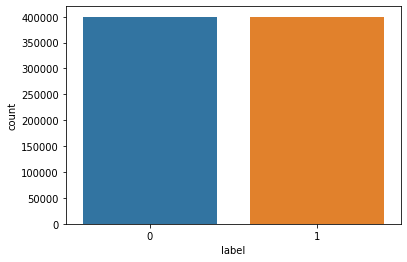

In [8]:
sns.countplot(x='label', data=train)

In [24]:
import neattext as nt

def removeWordsWithNumbers(text):
    return re.sub(r'\S*\d\S*', '', text).strip()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u"\U0001F600-\U0001F64F", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)

In [25]:
def clean_data(content):
    content = str(content)
    content = remove_emoticons(content)
    content = removeWordsWithNumbers(content)
    docx = nt.TextFrame(text=content)
    docx.remove_emojis()
    docx.remove_html_tags()
    docx.remove_puncts()
    docx.remove_urls()
    docx.remove_stopwords(lang='en')
    docx.remove_special_characters()
    docx.fix_contractions()
    docx.remove_numbers()

    return ' '.join(content.lower().strip().split())

In [26]:
cleaned_train = train.dropna(how='any', axis=0)
cleaned_train['comment'] = cleaned_train['comment'].apply(clean_data)
cleaned_train['author'] = cleaned_train['author'].apply(lambda x: x.strip())

cleaned_cv = cv.dropna(how='any', axis=0)
cleaned_cv['comment'] = cleaned_cv['comment'].apply(clean_data)
cleaned_cv['author'] = cleaned_cv['author'].apply(lambda x: x.strip())

cleaned_test = test.dropna(how='any', axis=0)
cleaned_test['comment'] = cleaned_test['comment'].apply(clean_data)
cleaned_test['author'] = cleaned_test['author'].apply(lambda x: x.strip())

In [27]:
#testing
train['comment'].iloc[66]

'Because anecdotes mean anything and being gay/trans is evil'

In [28]:
#testing
cleaned_train['comment'].iloc[66]

'because anecdotes mean anything and being gay/trans is evil'

In [29]:
cleaned_train['comment'] = cleaned_train['comment'].astype(str)
cleaned_cv['comment'] = cleaned_cv['comment'].astype(str)
cleaned_test['comment'] = cleaned_test['comment'].astype(str)

cleaned_train['author'] = cleaned_train['author'].astype(str)
cleaned_cv['author'] = cleaned_cv['author'].astype(str)
cleaned_test['author'] = cleaned_test['author'].astype(str)

In [31]:
cleaned_train.to_csv('data/clean/train.csv', index=None)
cleaned_cv.to_csv('data/clean/cv.csv', index=None)
cleaned_test.to_csv('data/clean/test.csv', index=None)